In [1]:
import FranecReader as fr
import importlib
importlib.reload(fr)
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# path to a singal simulation data directory
# !! must use u_filaefondi.sh firstly!!
path = "./070_for_test"

# read history data from $path/out/bigtab.txt
hist = fr.bigtab(path)

# read c core and o core mass from $path/grafica/gra_fisica
graf = fr.gra_fisica(path)
m_c = graf.data('M-Cs')
m_o = graf.data('M-Os')

# get model number of C ignition and He depeletion
mod_c_ign = hist.when_c_ign()
mod_a_dep = hist.when_he_depl()
print(mod_a_dep)
print(mod_c_ign)

25250
27550


In [3]:
print(graf.var_names)
print(graf.data('csi'))
print(len(m_c))

['nmod', 'eta', 'LogDt', 'L', 'Te', 'LogR', 'Logg', 'M', 'eta_1', 'Mpunto', 'Pc', 'Tc', 'Rhoc', 'MTmax', 'PTmax', 'Tmax', 'RhoTmax', 'MCC', 'RCC', 'LCC', 'PCC', 'TCC', 'RhoCC', 'M-CE', 'R-CE', 'L-CE', 'P-CE', 'T-CE', 'Rho-CE', 'M-Hs', 'epsi-Hs', 'R-Hs', 'L-Hs', 'P-Hs', 'T-Hs', 'Rho-Hs', 'blank', 'M-Hes', 'epsi-Hes', 'R-Hes', 'L-Hes', 'P-Hes', 'T-Hes', 'Rho-Hes', 'blank_1', 'M-Cs', 'epsi-Cs', 'R-Cs', 'L-Cs', 'P-Cs', 'T-Cs', 'Rho-Cs', 'blank_2', 'M-Nes', 'epsi-Nes', 'R-Nes', 'L-Nes', 'P-Nes', 'T-Nes', 'Rho-Nes', 'blank_3', 'M-Os', 'epsi-Os', 'R-Os', 'L-Os', 'P-Os', 'T-Os', 'Rho-Os', 'blank_4', 'M-Sis', 'epsi-Sis', 'R-Sis', 'L-Sis', 'P-Sis', 'T-Sis', 'Rho-Sis', 'blank_5', 'e-Photo', 'e-Weak', 'e-ncap', 'e-pcap', 'e-acap', 'e-pp', 'e-CNO', 'e-3a', 'e-C12', 'e-Ne20', 'e-O16', 'e-Si28', 'e-grav', 'e-neu', 'csi']
[0.00415229 0.00415272 0.00415302 ... 0.11475075 0.11501888 0.11528849]
1173


In [4]:
# read chi data file and f01 data file with path and model number
chi_c_ign = fr.mod_chi(path, mod_c_ign)
chi_a_dep = fr.mod_chi(path, mod_a_dep)
f01_c_ign = fr.mod_f01(path, mod_c_ign)
f01_a_dep = fr.mod_f01(path, mod_a_dep)

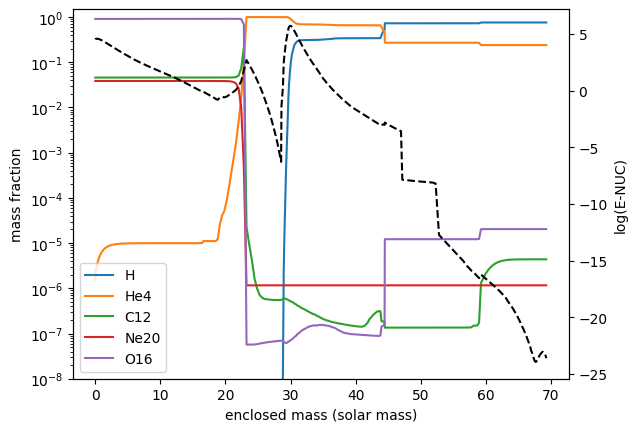

In [5]:
# draw massfraction and energy generation from nuclear reaction
fr.draw_mf_and_eps(path, mod_a_dep)

CO core mass: 22.23 M_sol


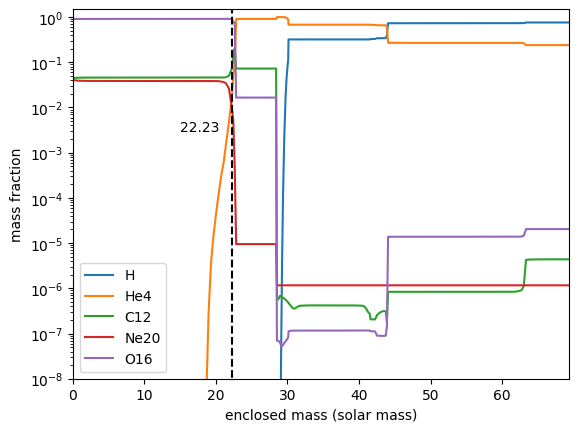

In [15]:
# find co core mass
co_mass = chi_c_ign.co_core(crit_he=0.01)[1]
print('CO core mass: %.2f M_sol'%co_mass)

chi_c_ign.draw_mf(nucs=["H", "He4", "C12", "Ne20", "O16"])
plt.vlines(co_mass, 0, 70, 'k', linestyles='--')
plt.text(15, 3e-3, f"{co_mass:.2f}");

Mass fraction of C12 in core: 4.59%


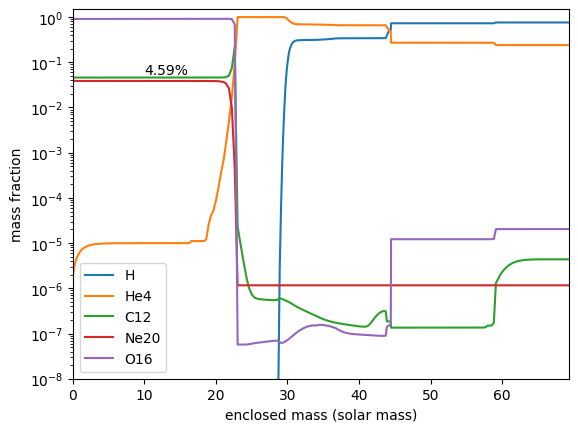

In [14]:
# find c12 mass frcaction
mf_c12 = chi_a_dep.data('C12')[0]
print('Mass fraction of C12 in core: %.2f%%'%(mf_c12*100))

chi_a_dep.draw_mf(nucs=["H", "He4", "C12", "Ne20", "O16"])
plt.text(10, mf_c12+0.01, f"{mf_c12:.2%}");